In [ ]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import numpy as np
from google.colab import files


df_train = pd.read_csv('/content/drive/MyDrive/train.csv')
df_comp = pd.read_csv('/content/drive/MyDrive/competition.csv')

In [ ]:
df_train.Installation_zone = df_train.Installation_zone.str.replace('Installation_zone ', '').astype(int)

In [ ]:
df_comp.Installation_zone = df_comp.Installation_zone.str.replace('Installation_zone ', '').astype(int)

In [ ]:
df_train.head()

,Year,Month,Consumer_type,Consumption,Consumer_number,Installation_zone
0,2013,1,domestic,0,MOGV36480546611521,1
1,2013,1,industrial,5,BECS02817768252637,2
2,2013,1,domestic,6,VRFW65577141436242,2
3,2013,1,domestic,1,QLLI18662653137621,2
4,2013,1,domestic,13,HYUO61823402850645,2


In [ ]:
df_comp.head()

,Year,Month,Consumption,Consumer_number,Installation_zone
0,2013,1,1,VENX08444954462680,1
1,2013,1,2,GRXC33020746550125,1
2,2013,1,1,FCGQ19814303536339,1
3,2013,1,5,EQKL85694875580467,3
4,2013,1,14,KCXW91343862250032,3


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329975 entries, 0 to 329974
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Year               329975 non-null  int64 
 1   Month              329975 non-null  int64 
 2   Consumer_type      329975 non-null  object
 3   Consumption        329975 non-null  int64 
 4   Consumer_number    329975 non-null  object
 5   Installation_zone  329975 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 15.1+ MB


## 1 Consumer can have more than one consumer_type

In [ ]:
pd.crosstab(df_train.Year,df_train.Month)

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2013,4081,3952,3915,3834,3849,3755,3764,3762,3783,3736,3790,3638
2014,4093,3903,3919,3841,3827,3757,3771,3761,3824,3743,3813,3641
2016,4144,3897,3896,3864,3862,3773,3797,3761,3803,3778,3814,3796
2017,4190,3910,3930,3894,3863,3763,3822,3804,3817,3809,3843,3987
2018,4280,4002,3940,3903,3882,3787,3847,3829,3844,3838,3812,4599
2019,4300,4025,3979,3930,3924,3807,3826,3833,3852,3797,3822,5040
2020,4295,3998,3978,3946,3950,3837,3852,3898,3878,3886,3788,6402


In [ ]:
df_train.groupby(df_train.Consumer_type).Consumption.mean()

Consumer_type
construction            7.730201
domestic                6.810613
industrial             11.294819
low income families     9.031031
rural commercial        6.162967
rural domestic          4.898583
rural expansion         3.474157
Name: Consumption, dtype: float64

In [ ]:
pd.crosstab(df_train.Installation_zone, df_train.Consumer_type)

Consumer_type,construction,domestic,industrial,low income families,rural commercial,rural domestic,rural expansion
Installation_zone,,,,,,,
1,230,73358,3511,322,51,0,0
2,384,41103,6160,113,1943,0,11
3,733,58190,5197,368,1800,23,1
4,386,63486,6020,171,0,18,0
5,33,0,16,0,0,2518,20
6,20,0,0,0,0,1093,53
7,45,0,0,0,0,2214,39
8,51,0,0,7,0,1840,0
9,19,0,9,0,0,2082,49


##

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Month'}>],
       [<Axes: title={'center': 'Consumption'}>,
        <Axes: title={'center': 'Installation_zone'}>]], dtype=object)

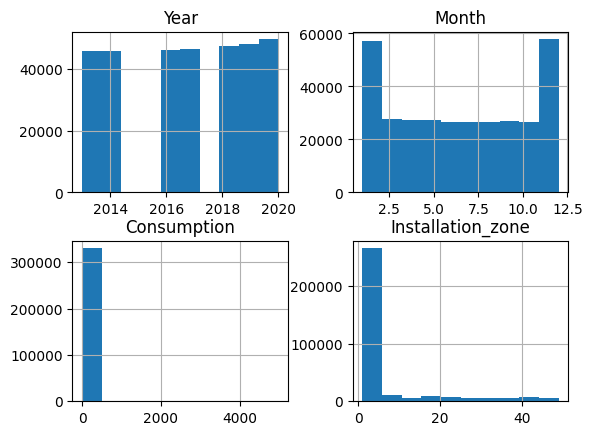

In [ ]:
df_train.hist()

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Month'}>],
       [<Axes: title={'center': 'Consumption'}>,
        <Axes: title={'center': 'Installation_zone'}>]], dtype=object)

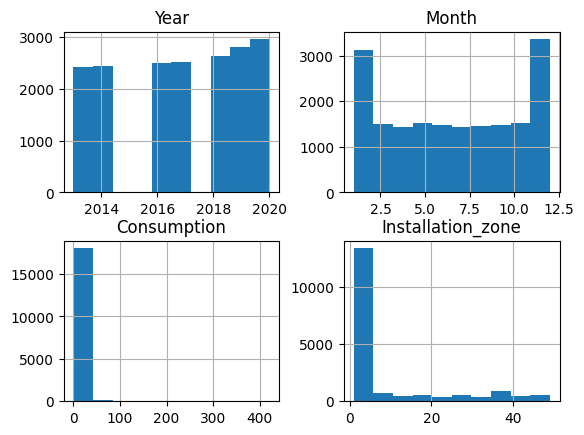

In [ ]:
df_comp.hist()

In [ ]:
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

The train dataa set has 5 input features and 1 label - Consumer_type

The aim is to classify a set of conusmers according to the consumer_type

In [ ]:
df_comp

,Year,Month,Consumption,Consumer_number,Installation_zone
0,2013,1,1,VENX08444954462680,1
1,2013,1,2,GRXC33020746550125,1
2,2013,1,1,FCGQ19814303536339,1
3,2013,1,5,EQKL85694875580467,3
4,2013,1,14,KCXW91343862250032,3
...,...,...,...,...,...
18274,2020,12,0,AEQZ48426066915128,26
18275,2020,12,0,BMPP69449933761787,17
18276,2020,12,0,XFJB02101108755437,44
18277,2020,12,0,YRTP25456715504279,2


In [ ]:
df_train.loc[df_train.Consumer_number=="MOGV36480546611521"]

,Year,Month,Consumer_type,Consumption,Consumer_number,Installation_zone
0,2013,1,domestic,0,MOGV36480546611521,1
4081,2013,2,domestic,1,MOGV36480546611521,1
45859,2014,1,domestic,0,MOGV36480546611521,1
49952,2014,2,domestic,0,MOGV36480546611521,1
91752,2016,1,domestic,0,MOGV36480546611521,1
95896,2016,2,domestic,0,MOGV36480546611521,1
118985,2016,8,domestic,0,MOGV36480546611521,1
126549,2016,10,domestic,0,MOGV36480546611521,1
137937,2017,1,domestic,0,MOGV36480546611521,1
157724,2017,6,domestic,0,MOGV36480546611521,1


In [ ]:
df_train['Consumer_type'].unique()

array(['domestic', 'industrial', 'rural commercial', 'construction',
       'low income families', 'rural domestic', 'rural expansion'],
      dtype=object)

In [ ]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

df_train['Consumer_type']=label_encoder.fit_transform(df_train['Consumer_type'])

In [ ]:
df_train['Consumer_type'].unique()

array([1, 2, 4, 0, 3, 5, 6])

## So now consumer_type is as follows:
0 - construction
1 - domestic
2 - industrial
3 - low income families
4 - rural commercial
5 - rural domestic
6 - rural expansion


In [ ]:
df_train.head(15)

,Year,Month,Consumer_type,Consumption,Consumer_number,Installation_zone,Numeric_ID
0,2013,1,1,0,MOGV36480546611521,1,36480546611521
1,2013,1,2,5,BECS02817768252637,2,02817768252637
2,2013,1,1,6,VRFW65577141436242,2,65577141436242
3,2013,1,1,1,QLLI18662653137621,2,18662653137621
4,2013,1,1,13,HYUO61823402850645,2,61823402850645
5,2013,1,2,27,FHMG62751338090488,2,62751338090488
6,2013,1,2,5,APVF78863215212358,2,78863215212358
7,2013,1,1,31,MXWL75757930683403,2,75757930683403
8,2013,1,2,2,NVMY31359391120094,2,31359391120094
9,2013,1,2,0,PZAN37359795617576,2,37359795617576


In [ ]:
import re # regex

# Extract numeric part of Consumer_number
df_train['Numeric_ID'] = df_train['Consumer_number'].apply(lambda x: re.sub(r'\D', '', x))

# Check for potential conflicts
conflict_mask = df_train.duplicated(subset=['Numeric_ID'], keep=False)

if conflict_mask.any():
    conflicted_ids = df_train.loc[conflict_mask, 'Consumer_number']
    print(f"Potential conflicts in Consumer_number:\n{conflicted_ids}")
else:
    # Convert the Numeric_ID to integer if there are no conflicts
    df_train['Numeric_ID'] = df_train['Numeric_ID'].astype(int)


Potential conflicts in Consumer_number:
0         MOGV36480546611521
1         BECS02817768252637
2         VRFW65577141436242
3         QLLI18662653137621
4         HYUO61823402850645
                 ...        
329945    XRRL04860397692112
329948    GSWV82320445083293
329953    TUBU84157265035658
329955    XETK30597183041897
329974    MJUV42827152944728
Name: Consumer_number, Length: 328100, dtype: object


In [ ]:
df_train.loc[df_train.Numeric_ID=="65577141436242"]

,Year,Month,Consumer_type,Consumption,Consumer_number,Installation_zone,Numeric_ID
2,2013,1,1,6,VRFW65577141436242,2,65577141436242
4083,2013,2,1,4,VRFW65577141436242,2,65577141436242
38431,2013,11,1,4,VRFW65577141436242,2,65577141436242
45861,2014,1,1,4,VRFW65577141436242,2,65577141436242
49954,2014,2,1,4,VRFW65577141436242,2,65577141436242
61615,2014,5,1,0,VRFW65577141436242,2,65577141436242
91754,2016,1,1,1,VRFW65577141436242,2,65577141436242
99793,2016,3,1,2,VRFW65577141436242,2,65577141436242
137939,2017,1,1,3,VRFW65577141436242,2,65577141436242
146037,2017,3,1,0,VRFW65577141436242,2,65577141436242


# Data is very strongly imbalanced
  

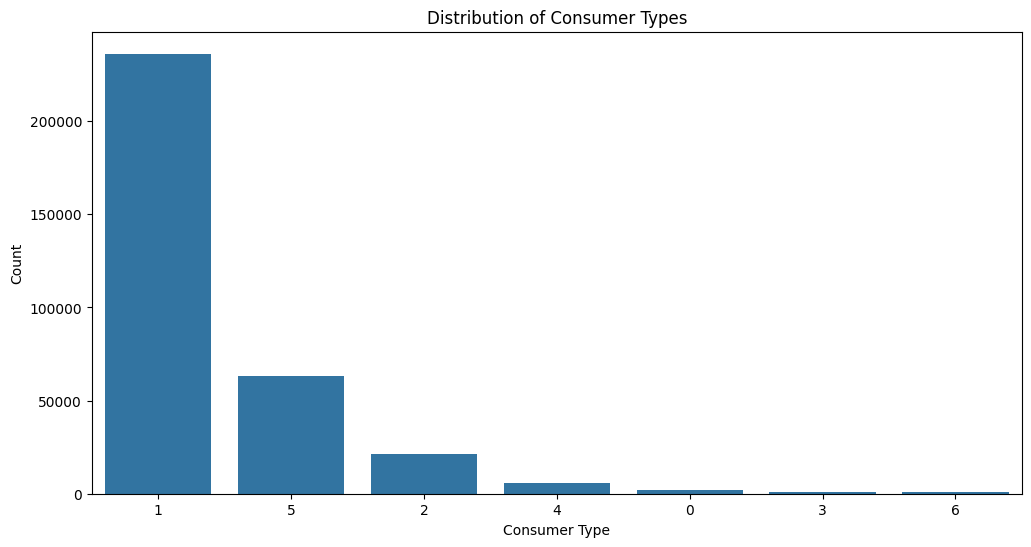

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.countplot(x='Consumer_type', data=df_train, order=df_train['Consumer_type'].value_counts().index)
plt.title('Distribution of Consumer Types')
plt.xlabel('Consumer Type')
plt.ylabel('Count')
plt.show()

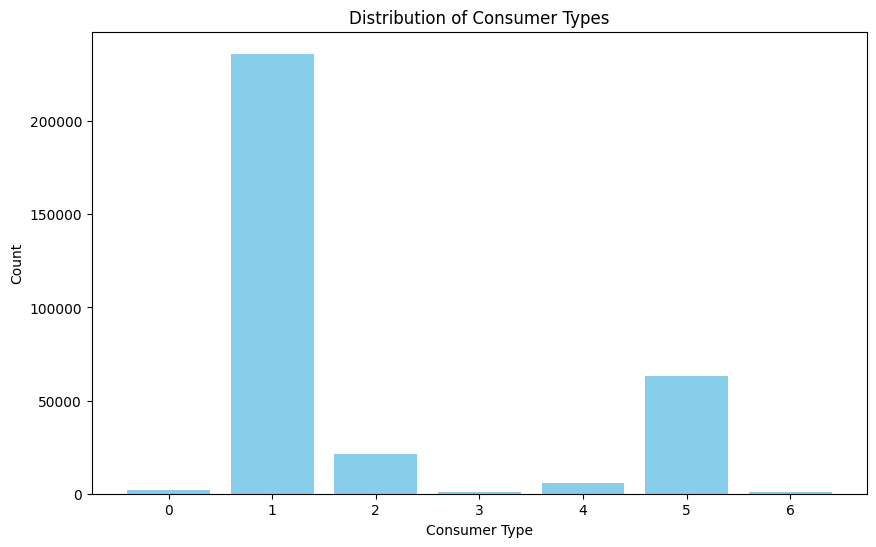

In [ ]:
import matplotlib.pyplot as plt

consumer_type_counts = df_train['Consumer_type'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(consumer_type_counts.index, consumer_type_counts.values, color='skyblue')
plt.title('Distribution of Consumer Types')
plt.xlabel('Consumer Type')
plt.ylabel('Count')
plt.show()


In [ ]:
df_train_array = df_train.values

In [ ]:
df_train_array

array([[2013, 1, 1, ..., 'MOGV36480546611521', 1, '36480546611521'],
       [2013, 1, 2, ..., 'BECS02817768252637', 2, '02817768252637'],
       [2013, 1, 1, ..., 'VRFW65577141436242', 2, '65577141436242'],
       ...,
       [2020, 12, 5, ..., 'DWGA69725679861554', 7, '69725679861554'],
       [2020, 12, 5, ..., 'VJDC45865594518045', 32, '45865594518045'],
       [2020, 12, 1, ..., 'MJUV42827152944728', 1, '42827152944728']],
      dtype=object)

<ipython-input-42-eaff7ed659e0>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.lineplot(x='Year', y='Consumption', hue='Consumer_type', marker='o',data=df_train.groupby(['Year', 'Consumer_type']).mean().reset_index())


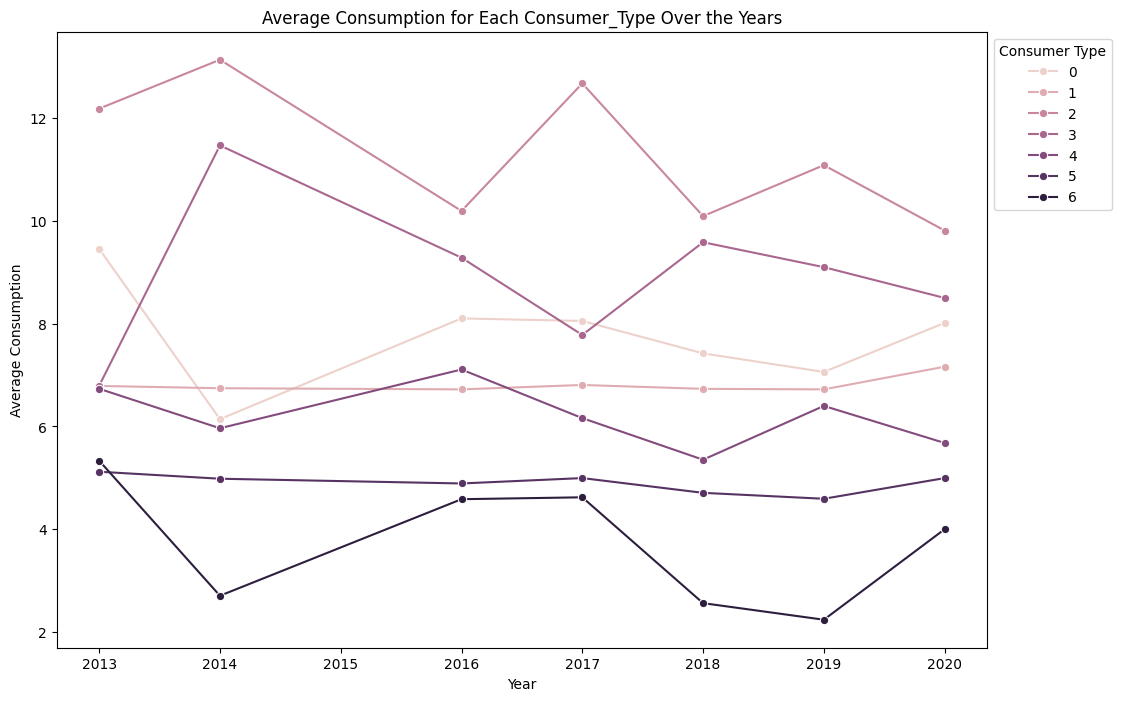

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.lineplot(x='Year', y='Consumption', hue='Consumer_type', marker='o',data=df_train.groupby(['Year', 'Consumer_type']).mean().reset_index())
plt.title('Average Consumption for Each Consumer_Type Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Consumption')
plt.legend(title='Consumer Type', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()


<Axes: xlabel='Consumer_type', ylabel='Consumption'>

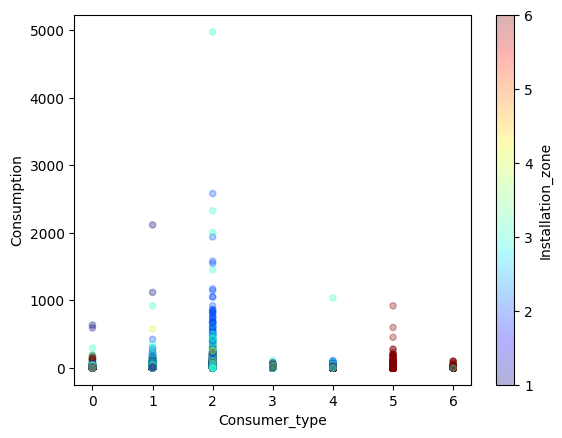

In [ ]:
df_train.plot(kind='scatter', x='Consumer_type', y='Consumption', alpha=0.3,
              # s='Consumption', label='Consumption', figsize=(10,7),
              c='Installation_zone', cmap=plt.get_cmap("jet"), colorbar=True, vmax=6,
              sharex=False
              )

array([[<Axes: xlabel='Consumption', ylabel='Consumption'>,
        <Axes: xlabel='Installation_zone', ylabel='Consumption'>,
        <Axes: xlabel='Year', ylabel='Consumption'>,
        <Axes: xlabel='Month', ylabel='Consumption'>],
       [<Axes: xlabel='Consumption', ylabel='Installation_zone'>,
        <Axes: xlabel='Installation_zone', ylabel='Installation_zone'>,
        <Axes: xlabel='Year', ylabel='Installation_zone'>,
        <Axes: xlabel='Month', ylabel='Installation_zone'>],
       [<Axes: xlabel='Consumption', ylabel='Year'>,
        <Axes: xlabel='Installation_zone', ylabel='Year'>,
        <Axes: xlabel='Year', ylabel='Year'>,
        <Axes: xlabel='Month', ylabel='Year'>],
       [<Axes: xlabel='Consumption', ylabel='Month'>,
        <Axes: xlabel='Installation_zone', ylabel='Month'>,
        <Axes: xlabel='Year', ylabel='Month'>,
        <Axes: xlabel='Month', ylabel='Month'>]], dtype=object)

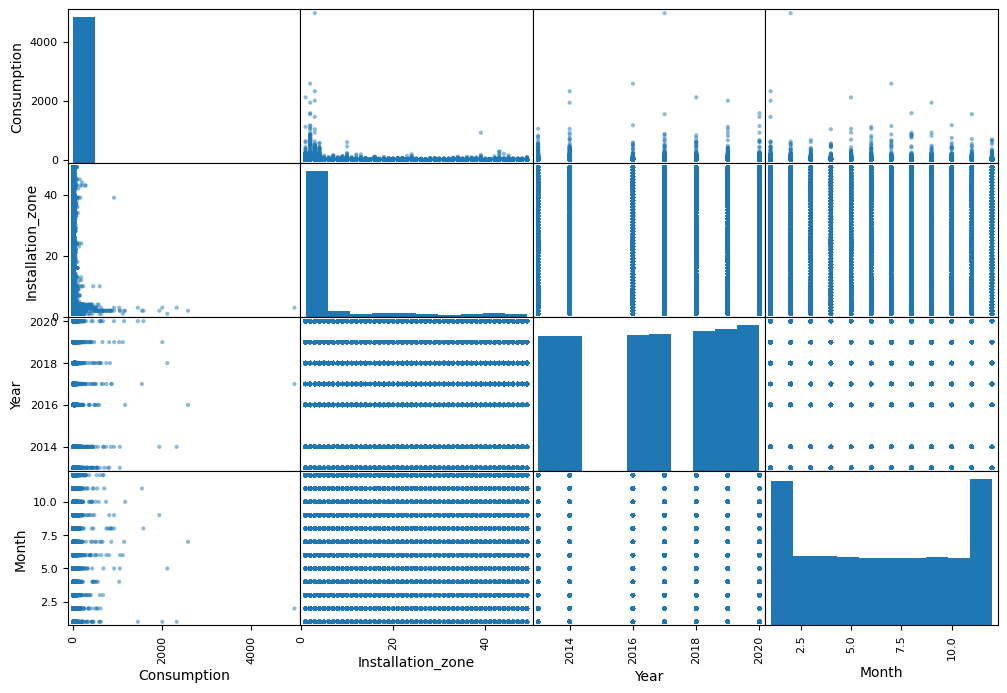

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ["Consumption", "Installation_zone", "Year",
              "Month"]
scatter_matrix(df_train[attributes], figsize=(12, 8))

# RandomForestClassifier model

In [ ]:
installation_zone_dummies = pd.get_dummies(df_train['Installation_zone'], prefix='Installation_zone')

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

features = ['Year', 'Month', 'Consumption', 'Installation_zone']
X = df_train[features]

# Target
y = df_train['Consumer_type']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

rf_classifier = RandomForestClassifier(random_state=20)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

classification_rep = classification_report(y_test, y_pred)
print('Classification Report:\n', classification_rep)


Accuracy: 0.9103
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       460
           1       0.90      1.00      0.95     47277
           2       0.45      0.04      0.07      4152
           3       0.00      0.00      0.00       209
           4       0.90      0.32      0.47      1135
           5       0.97      0.99      0.98     12561
           6       0.00      0.00      0.00       201

    accuracy                           0.91     65995
   macro avg       0.46      0.34      0.35     65995
weighted avg       0.87      0.91      0.88     65995



In [ ]:
len(X_train)

263980

In [ ]:
len(y_test)

65995

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
forest_clf = RandomForestClassifier()

In [ ]:
from sklearn.model_selection import cross_val_predict
probabilities = cross_val_predict(forest_clf, X_train, y_train, method='predict_proba')

In [ ]:
forest_clf.fit(X_train, y_train)

RandomForestClassifier()